In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from IPython.core.display import HTML
def nan_counts_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].isna().sum(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def nunqiue_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].nunique(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def value_counts_all(df, columns):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts()))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [5]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [6]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14140 entries, 0 to 14139
Columns: 3465 entries, id to mesh20
dtypes: float64(3460), int64(1), object(4)
memory usage: 373.8+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Columns: 3464 entries, id to mesh20
dtypes: float64(3459), int64(1), object(4)
memory usage: 106.7+ MB


In [9]:
print(f"number of missing values in train: {train.isnull().sum().sum()}")
print(f"number of missing values in test: {test.isnull().sum().sum()}")

number of missing values in train: 10830377
number of missing values in test: 2415159


In [10]:
#欠損値をリスト
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
display(train_missing.head(20))

,total,percent
MAX_MCARI2_2011,10013,0.708133
MAX_SLAVI_2011,10013,0.708133
MED_SWIR1_2011,10013,0.708133
MED_NIR_2011,10013,0.708133
MED_Red_2011,10013,0.708133
MED_Green_2011,10013,0.708133
MED_Blue_2011,10013,0.708133
MAX_VARIgreen_2011,10013,0.708133
MAX_SIPI2_2011,10013,0.708133
MAX_IF_2011,10013,0.708133


In [11]:
#欠損値をリスト
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
test_missing.head(20)

,total,percent
MED_Fe3_2011,2496,0.617975
MED_VARIgreen_2011,2496,0.617975
MIN_Green_2011,2496,0.617975
MIN_Red_2011,2496,0.617975
MIN_NIR_2011,2496,0.617975
MIN_SWIR1_2011,2496,0.617975
MIN_SWIR2_2011,2496,0.617975
MIN_TIRS1_2011,2496,0.617975
MIN_TIRS2_2011,2496,0.617975
MIN_TSAVI_2011,2496,0.617975


In [12]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


max : 1.000000
min : 0.000000
Skewness: 1.570970
Kurtosis: 1.087887


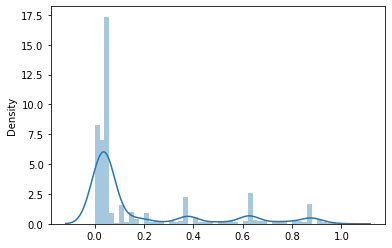

In [13]:
sns.distplot(train[target])

print("max : %f" %train[target].max())
print("min : %f" %train[target].min())
print('Skewness: %f' %train[target].skew())  #歪度
print('Kurtosis: %f' %train[target].kurt())  #尖度

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


log train Skewness: 1.407326
log train Kurtosis: 0.506788


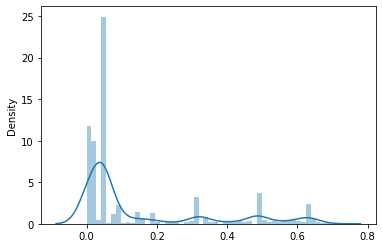

In [14]:
sns.distplot(np.log(train[target]+1))

print('log train Skewness: %f' %np.log(train[target]+1).skew())  #歪度
print('log train Kurtosis: %f' %np.log(train[target]+1).kurt())  #尖度

In [15]:
categorical_features = train.dtypes[train.dtypes=="object"].index

train[categorical_features].head()

,YMD,Landsat_StartTime,PRODUCT_ID,mesh20
0,20110926,02:15.1,LE07_L1TP_115043_20120118_20200909_02_T1,3725_10
1,2009.7.6-2009.7.28,45:26.6,LE07_L1TP_113041_20090706_20200911_02_T1,4027_13
2,20091014,46:43.0,LE07_L1TP_113042_20091229_20200911_02_T1,3927_22
3,2009.1.13-2009.2.19,NaN,NaN,4027_13
4,2009.1.13-2009.2.19,44:31.2,LE07_L1TP_113041_20081210_20200912_02_T1,4027_13


In [16]:
train_missing_50 = train_missing[train_missing.percent<0.3].index
test_missing_50 =  test_missing[test_missing.percent<0.3].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [17]:
display(train[features])

,MED_CTVI_2008,MAX_Ferrous_Silicates_2019,MAX_BWDRVI_2013,MAX_D678_500_2015,MIN_Gossan_2017,MED_Red_2013,MIN_NormG_2013,MAX_SWIR2_2016,MIN_MCARI1_2020,MIN_Fe3_2006,...,MIN_D678_500_2008,MED_GARI_2015,MAX_AOT,MIN_EVI_2020,MIN_RDVI_2017,MAX_NLI_2006,MED_NLI_2019,MED_B11,MAX_DSWI_5_2016,sst_ymd
0,0.325265,0.270605,-0.951070,-33.924212,0.057253,30.276396,0.495465,0.760754,8.142066,0.504291,...,-40.034186,-0.257073,204.0,0.071404,-2.281271,0.992658,0.578601,134.000336,-1.104315,28.750600
1,0.544234,0.174384,-0.906278,-27.142933,0.020719,33.218049,0.434112,2.976730,0.821317,0.656246,...,-23.067471,0.009361,204.0,-0.402986,-3.666711,0.936073,0.976667,811.198669,-0.180834,27.285750
2,0.405652,0.233623,-0.974138,-37.035366,0.022718,21.077793,0.574517,5.579601,9.029748,0.616905,...,-33.665972,-0.044725,204.0,0.092381,-3.008956,0.880823,0.727847,1220.452026,-0.402340,26.944032
3,NaN,0.239805,-0.980232,-39.949844,0.030804,17.094396,0.645741,0.256448,21.863384,NaN,...,NaN,-0.202070,204.0,0.057929,-2.296187,NaN,0.145623,462.755005,-1.825427,21.462371
4,NaN,0.235250,-0.983097,-43.430824,0.042625,15.663786,0.666427,6.827363,27.179392,0.428987,...,NaN,-0.198903,204.0,0.039712,-2.025984,0.673919,0.105729,406.848724,-0.402130,21.429968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,0.471606,0.256744,-0.902146,-28.375822,0.064607,37.813976,0.405731,1.749066,11.649003,0.616868,...,-41.116438,-0.285335,204.0,-0.000646,-1.780198,0.880027,0.809159,450.751648,-0.333739,28.841067
14136,0.172631,0.249441,-0.983241,-41.276701,0.026797,21.997087,0.645435,6.911295,20.635847,0.791515,...,-44.549273,-0.073570,204.0,0.079412,-3.673188,0.957393,-0.097960,695.141846,-0.434398,28.070419
14137,0.094257,0.249736,-0.956411,-41.606283,0.056927,24.216372,0.537486,1.984999,9.660224,0.437255,...,-59.720447,-0.164890,204.0,0.060470,-2.681108,0.666617,0.490985,203.546127,-0.640291,22.217586
14138,NaN,0.179414,-0.944212,-38.183182,0.036592,64.377785,0.494049,1.040583,-20.083477,0.578317,...,NaN,0.220983,204.0,0.272178,-4.284588,0.620085,0.875745,1032.687134,-0.864305,21.467750


## Model

In [18]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from sklearn.metrics import mean_squared_error

In [19]:
class CFG:
  ver=1
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols="cover"
  boosting_type="gbdt"

In [20]:
# =========================================================================================
# CV split
# =========================================================================================
target_bins = [-1, .3, .5, .7, 1]
target_bin_name = ['0-0.3', '0.3-0.5', '0.5-0.7', '0.7-']
train["target_bins"] = pd.cut(train[target].cover, bins=target_bins, labels=target_bin_name)
bins_map = {'0-0.3':0, '0.3-0.5':1, '0.5-0.7':2, '0.7-':3}
train["bins"] = train["target_bins"].map(bins_map)

kfold = StratifiedGroupKFold(n_splits = CFG.n_folds, shuffle = True, random_state = CFG.seed)
for num, (train_index, val_index) in enumerate(kfold.split(train.id, train["bins"], groups=train["mesh20"])):
    train.loc[val_index, 'fold'] = int(num)
train['fold'] = train['fold'].astype(int)
display(train.groupby('fold').size())

fold
0    3405
1    1158
2    6006
3    3571
dtype: int64

In [21]:
features = list(features)
features.remove('id')

In [22]:
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6
    }

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's rmse: 0.219964
RMSE : 0.2199637887756468
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's rmse: 0.114866
RMSE : 0.11486585676015298
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[46]	valid_0's rmse: 0.192209
RMSE : 0.19220875978613064
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[15]	valid_0's rmse: 0.354775
RMSE : 0.3547752195373156


,feature,importance
1464,warm_sst,0.012293
1396,hist_warm_sst,0.012057
698,Date_Acquired,0.011584
1806,depth,0.011348
1257,MIN_GARI,0.010875
985,area,0.010402
1332,month,0.008983
440,sst_diff,0.008038
1070,MIN_D678_500,0.007329
2107,sst_ymd,0.007329


CV Score: 0.24537865119362284


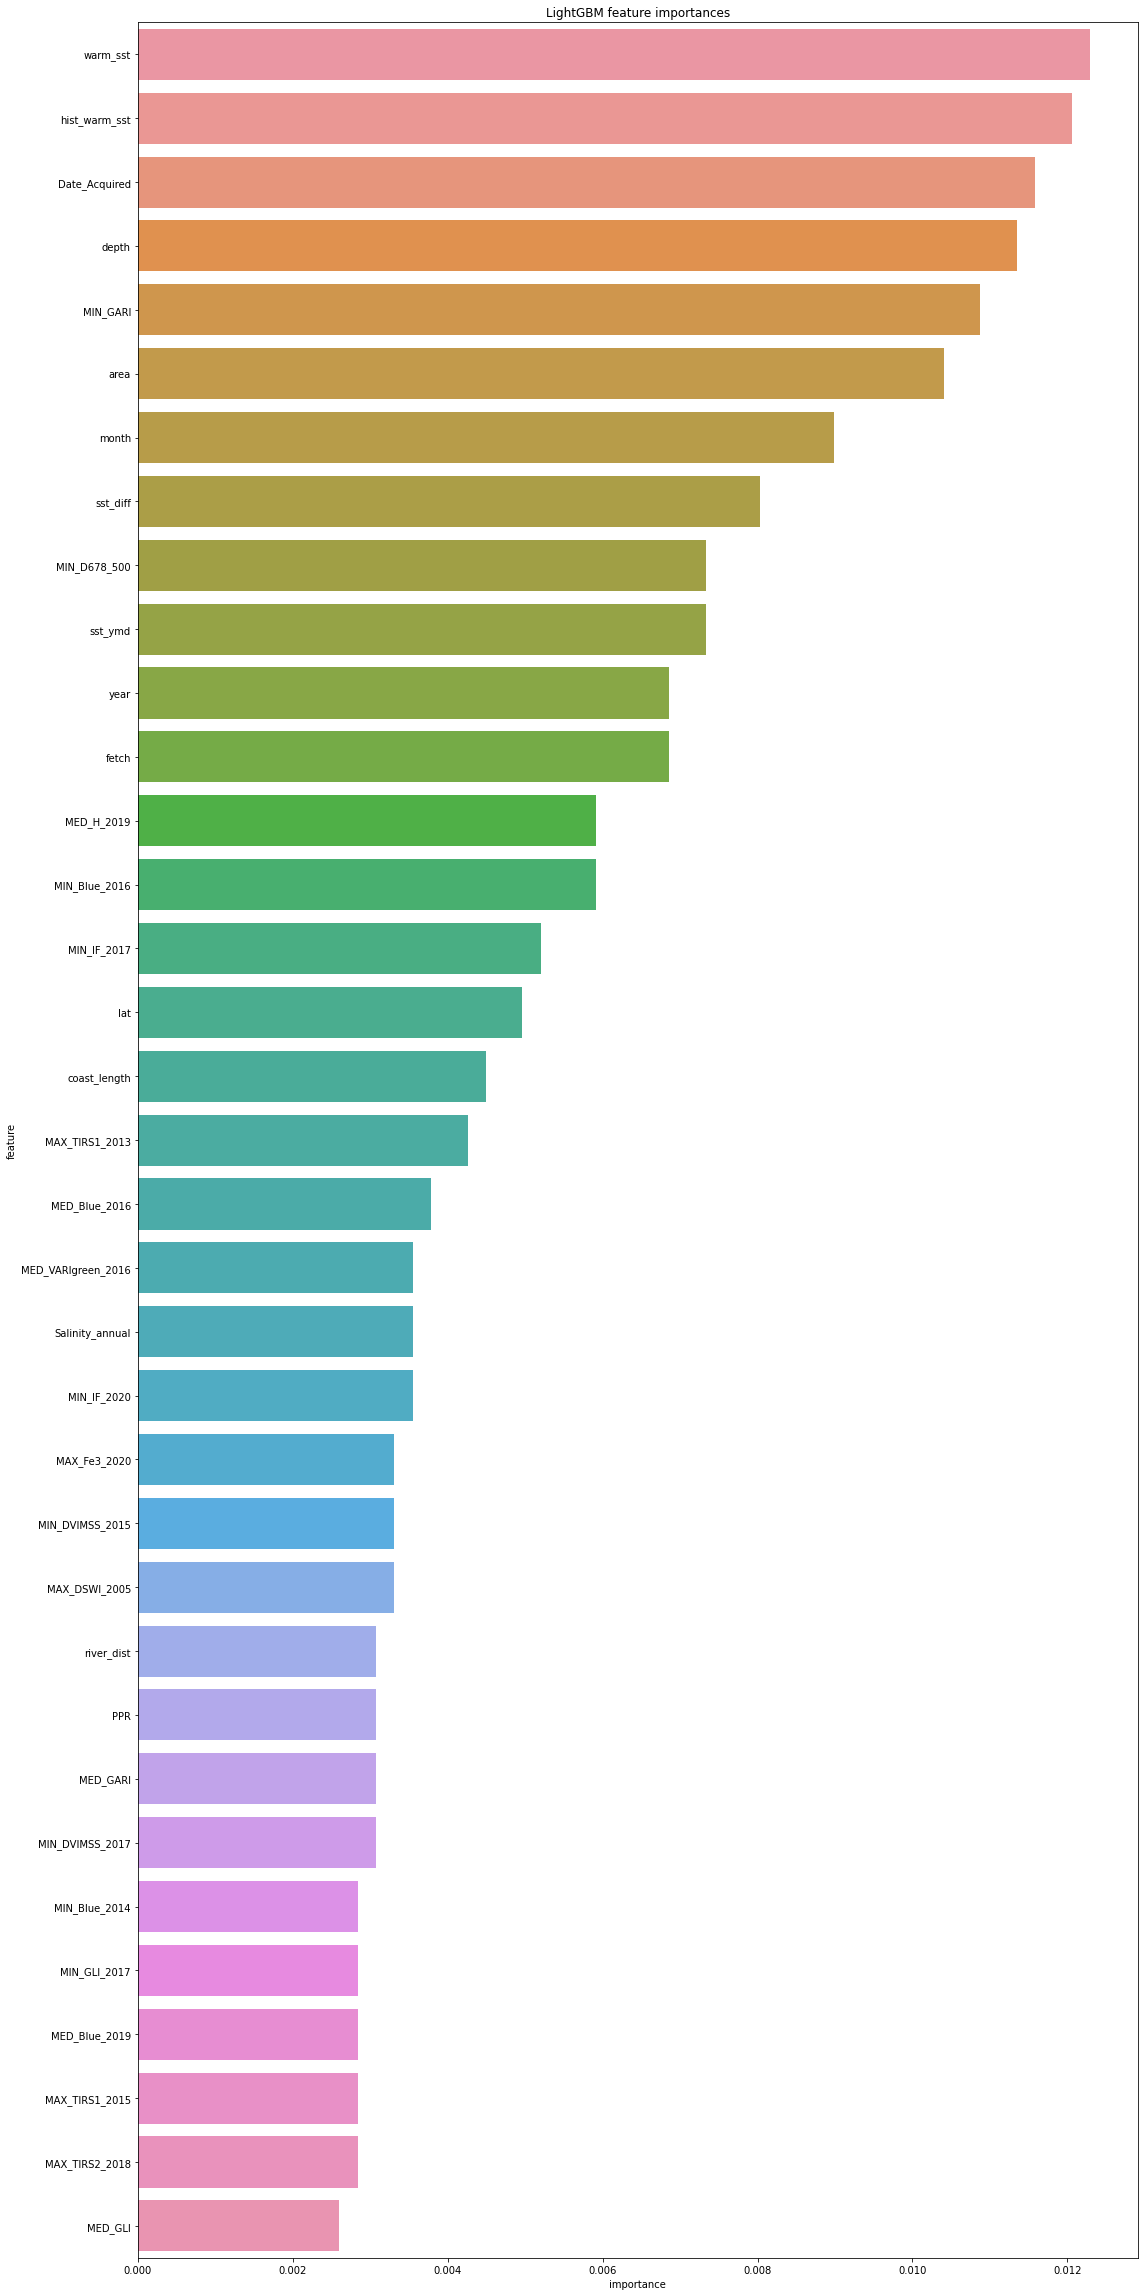

In [23]:
oof_df = pd.DataFrame()
df_importance = pd.DataFrame({'feature': features})
df_importance['importance'] = 0

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[features].values
    valid_X = valid_folds[features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    oof_df = pd.concat([oof_df, valid_folds])

    f_importance = np.array(model.feature_importances_)
    temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
    df_importance['importance'] += temp_importance['importance']

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
df_importance = df_importance.sort_values('importance', ascending=False)
best_features35 = df_importance.iloc[:35].feature.tolist()
best_features50 = df_importance.iloc[:50].feature.tolist()
display(df_importance.head(35))
fig = plt.figure(figsize=(16, 32), tight_layout=True)
sns.barplot(x="importance", y="feature", data=df_importance.head(35))
plt.title("LightGBM feature importances")
score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')

In [24]:
tmp_features = df_importance.loc[df_importance.importance>0].feature.tolist()
weak_features = set(tmp_features) - set(best_features35)
weak_features = list(weak_features)

oof_weak_df = pd.DataFrame()

params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1
    }

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[weak_features].values
    valid_X = valid_folds[weak_features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["weak_pred"] = model.predict(valid_X)
    oof_weak_df = pd.concat([oof_weak_df, valid_folds])

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["weak_pred"]))
    print(f"RMSE : {score}")

train = train.merge(oof_weak_df[["id","weak_pred"]],how="left",on="id")
score = np.sqrt(mean_squared_error(oof_weak_df[CFG.target_cols], oof_weak_df["weak_pred"]))
print(f'CV Score: {score}')

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's rmse: 0.215948
RMSE : 0.21594794672983095
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's rmse: 0.118485
RMSE : 0.11848526668824577
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[51]	valid_0's rmse: 0.1915
RMSE : 0.19150006548019038
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[8]	valid_0's rmse: 0.354082
RMSE : 0.3540818173537591
CV Score: 0.24416934836460943


===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's rmse: 0.212891
RMSE : 0.21289138840399285
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[43]	valid_0's rmse: 0.116922
RMSE : 0.11692240611758983
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[99]	valid_0's rmse: 0.184037
RMSE : 0.18403703248082642
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[7]	valid_0's rmse: 0.352755
RMSE : 0.3527548236566786
CV Score: 0.24051109695681586


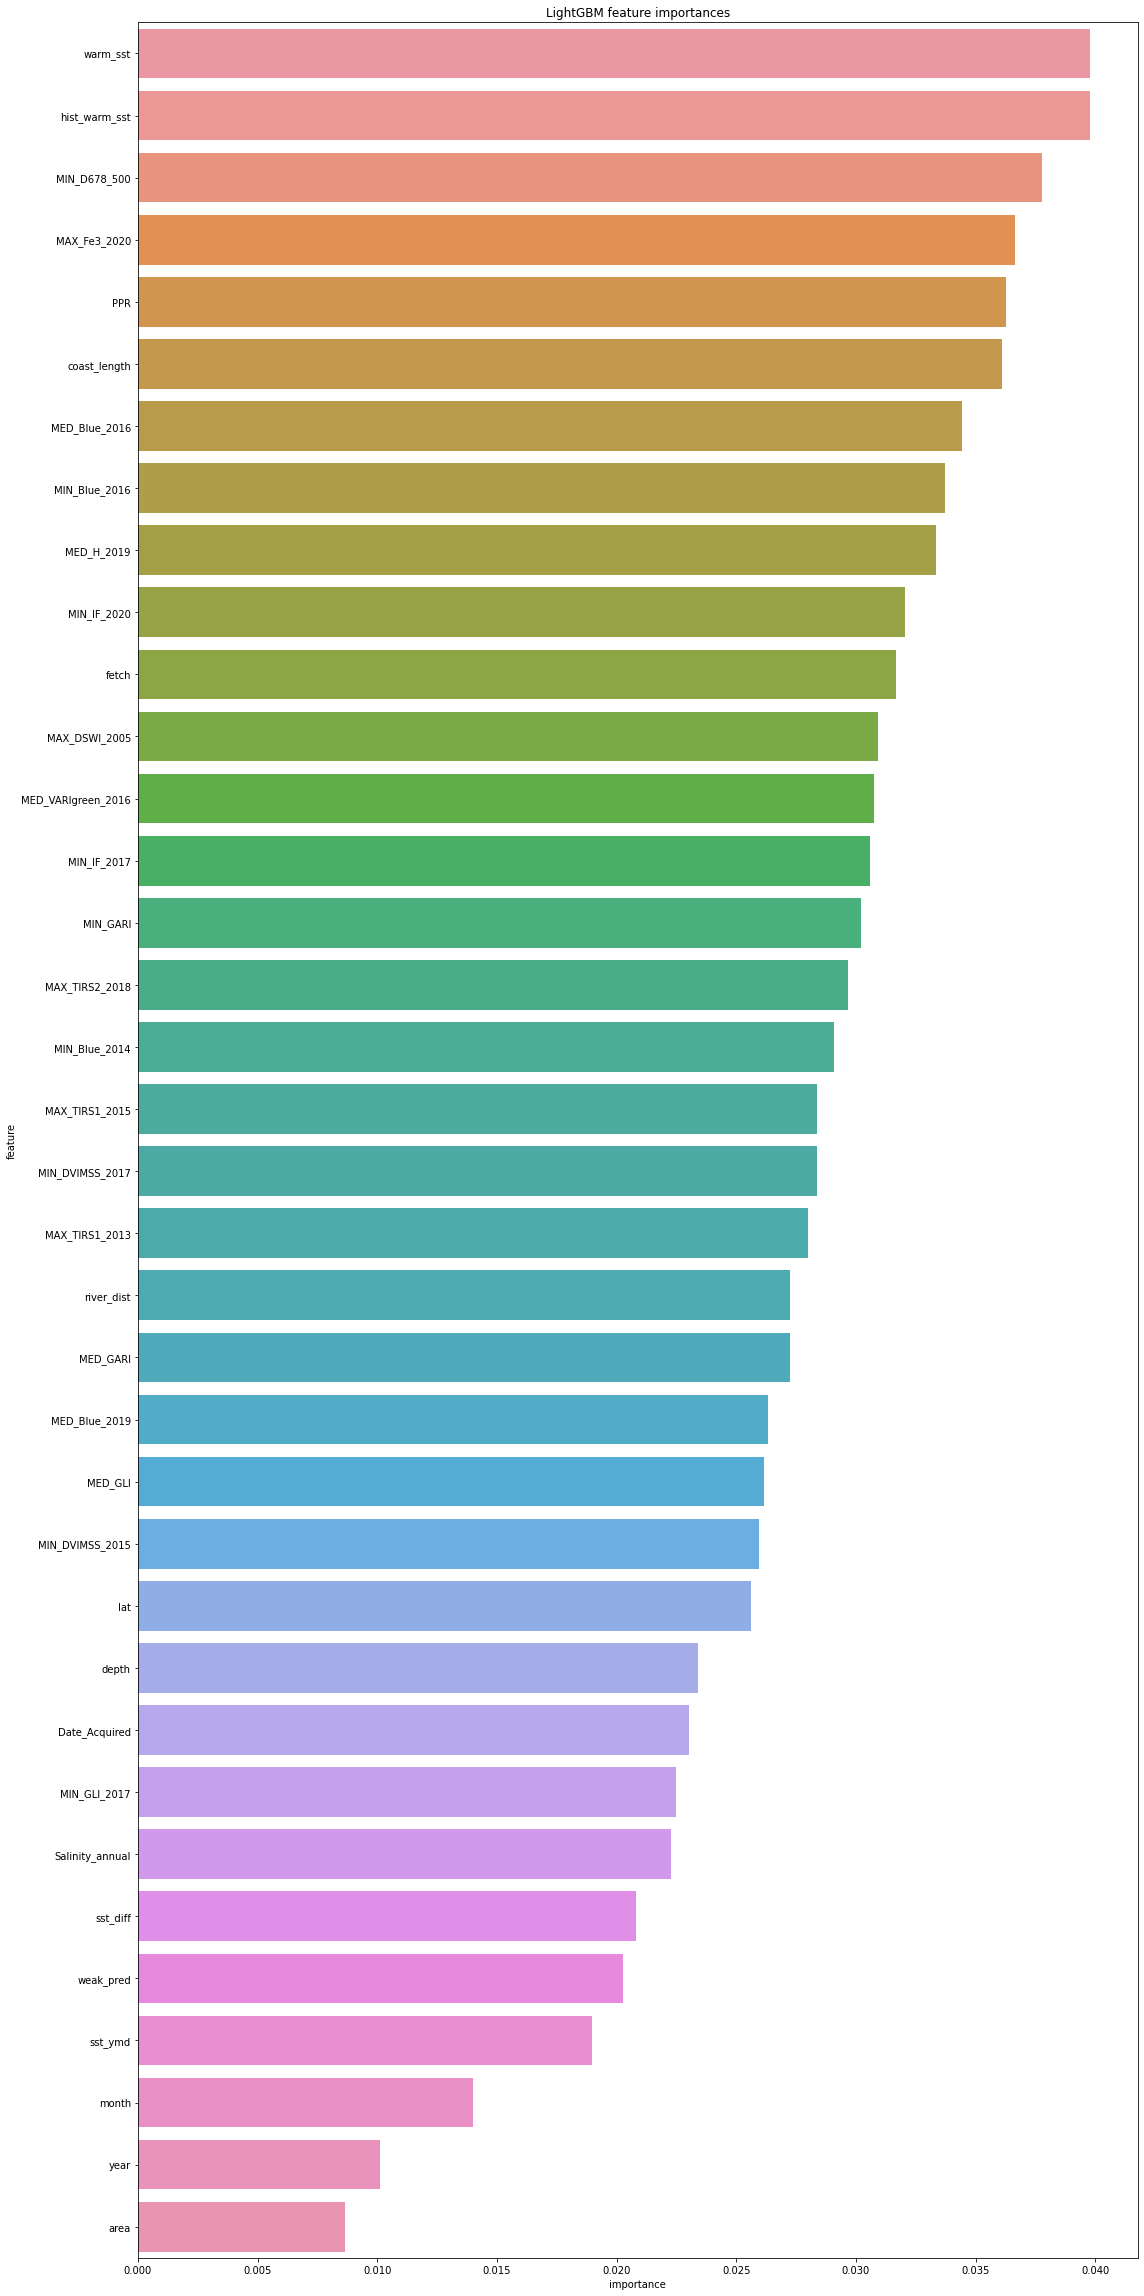

In [25]:
new_features = best_features35 + ["weak_pred"]
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1
    }

oof_df = pd.DataFrame()
df_importance = pd.DataFrame({'feature': new_features})
df_importance['importance'] = 0

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[new_features].values
    valid_X = valid_folds[new_features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    oof_df = pd.concat([oof_df, valid_folds])

    f_importance = np.array(model.feature_importances_)
    temp_importance = pd.DataFrame({'feature': new_features, 'importance': f_importance})
    df_importance['importance'] += temp_importance['importance']

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
df_importance = df_importance.sort_values('importance', ascending=False)
fig = plt.figure(figsize=(16, 32), tight_layout=True)
sns.barplot(x="importance", y="feature", data=df_importance.head(50))
plt.title("LightGBM feature importances")
score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')

In [26]:
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1
    }

oof_df = pd.DataFrame()
test_preds = np.zeros((len(test), CFG.n_folds))

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[best_features50].values
    valid_X = valid_folds[best_features50].values
    test_X = test[best_features50].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    test_preds[:, fold] = model.predict(test_X)
    oof_df = pd.concat([oof_df, valid_folds])

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')
pd.DataFrame(np.mean(test_preds, axis=1)).to_csv(os.path.join(OUTPUT_DIR, f'submit_{CFG.model}_seed{CFG.seed}_ver{CFG.ver}.csv'), header=False)

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's rmse: 0.21012
RMSE : 0.21011953557361582
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.111878
RMSE : 0.1118782328753766
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[76]	valid_0's rmse: 0.183092
RMSE : 0.1830922737589698
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[12]	valid_0's rmse: 0.346925
RMSE : 0.34692457029548607
CV Score: 0.23725762962631575
